In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#load taxis dataset

In [ ]:
df=sns.load_dataset("taxis")

In [ ]:
print(df.head)

<bound method NDFrame.head of                   pickup             dropoff  passengers  distance  fare  \
0    2019-03-23 20:21:09 2019-03-23 20:27:24           1      1.60   7.0   
1    2019-03-04 16:11:55 2019-03-04 16:19:00           1      0.79   5.0   
2    2019-03-27 17:53:01 2019-03-27 18:00:25           1      1.37   7.5   
3    2019-03-10 01:23:59 2019-03-10 01:49:51           1      7.70  27.0   
4    2019-03-30 13:27:42 2019-03-30 13:37:14           3      2.16   9.0   
...                  ...                 ...         ...       ...   ...   
6428 2019-03-31 09:51:53 2019-03-31 09:55:27           1      0.75   4.5   
6429 2019-03-31 17:38:00 2019-03-31 18:34:23           1     18.74  58.0   
6430 2019-03-23 22:55:18 2019-03-23 23:14:25           1      4.14  16.0   
6431 2019-03-04 10:09:25 2019-03-04 10:14:29           1      1.12   6.0   
6432 2019-03-13 19:31:22 2019-03-13 19:48:02           1      3.85  15.0   

       tip  tolls  total   color      payment            

In [ ]:
#check missing values

In [ ]:
print(df.isnull().sum())

pickup              0
dropoff             0
passengers          0
distance            0
fare                0
tip                 0
tolls               0
total               0
color               0
payment            44
pickup_zone        26
dropoff_zone       45
pickup_borough     26
dropoff_borough    45
dtype: int64


In [ ]:
#Filling missing with [mean]

In [ ]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in num_cols:
    df[col].fillna(df[col].mean(), inplace=True)

/tmp/ipython-input-2219061484.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [ ]:
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

/tmp/ipython-input-93522249.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [ ]:
df.dropna(inplace=True)

In [ ]:
print("Missing values handled succesfully")

Missing values handled succesfully


In [ ]:
#Line Chart

In [ ]:
df['pickup'] = pd.to_datetime(df['pickup'])

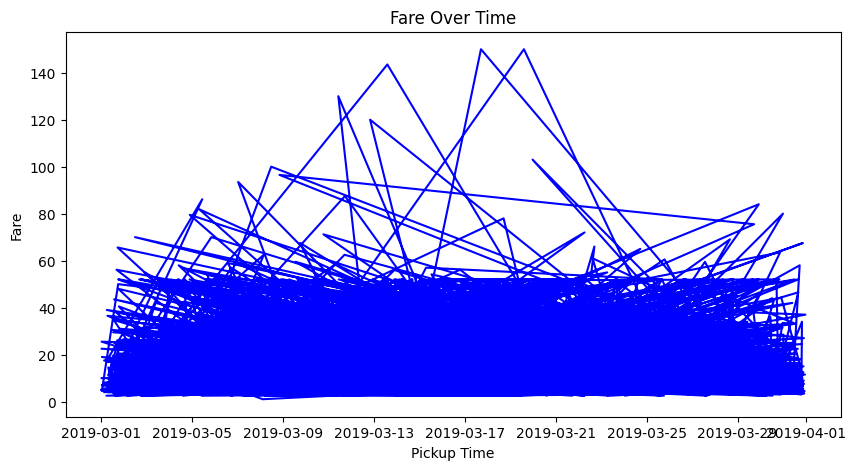

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(df['pickup'], df['fare'], color='blue')
plt.title('Fare Over Time')
plt.xlabel('Pickup Time')
plt.ylabel('Fare')
plt.show()

In [ ]:
#Bar chart

In [ ]:
fare_by_borough = df.groupby('pickup_borough')['fare'].sum()

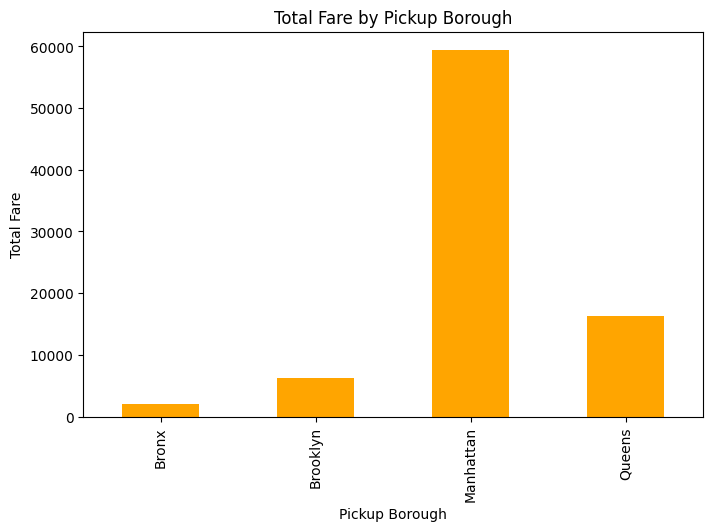

In [ ]:

fare_by_borough.plot(kind='bar', color='orange', figsize=(8,5))
plt.title('Total Fare by Pickup Borough')
plt.xlabel('Pickup Borough')
plt.ylabel('Total Fare')
plt.show()

In [ ]:
#Pie chart [Payment]

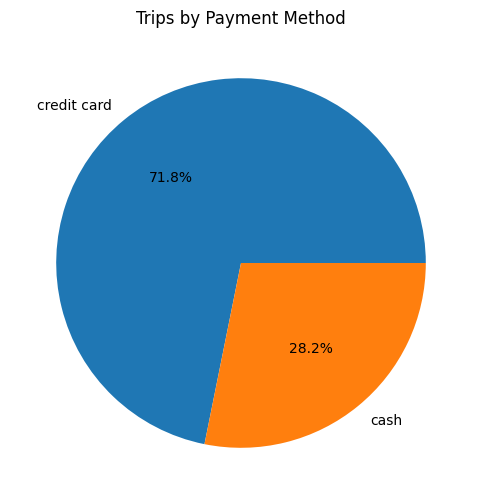

In [ ]:
payment_counts = df['payment'].value_counts()

payment_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(6,6))
plt.title('Trips by Payment Method')
plt.ylabel('')
plt.show()

In [ ]:
#Histogram[Trip distance]

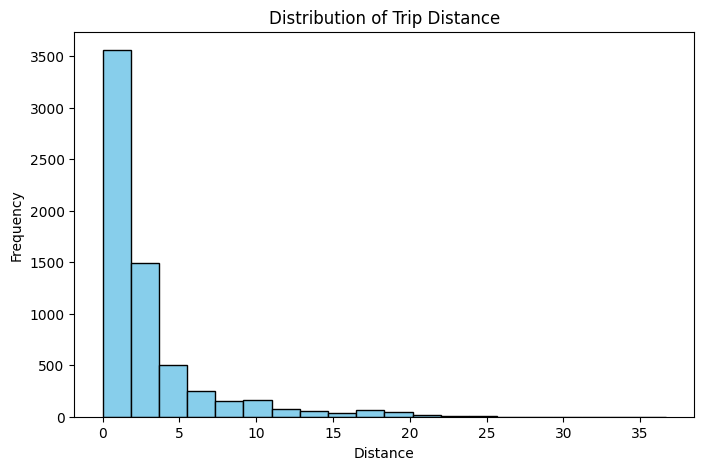

In [ ]:
plt.figure(figsize=(8,5))
plt.hist(df['distance'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Trip Distance')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#Box plot [Amount]

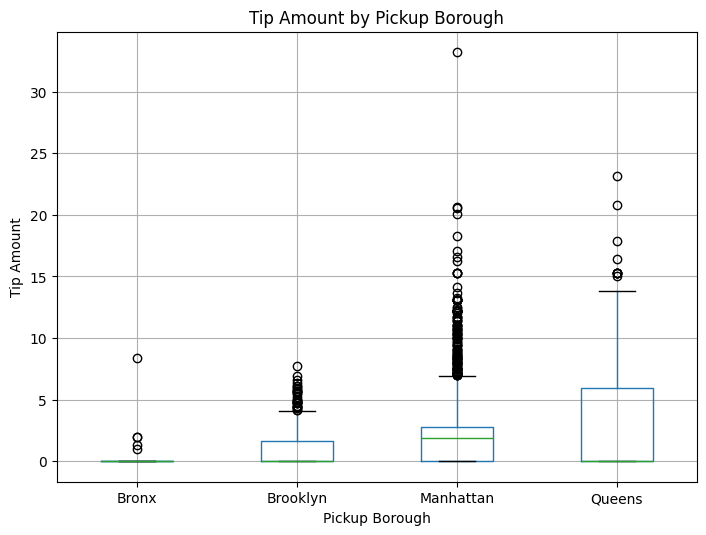

In [ ]:
df.boxplot(column='tip', by='pickup_borough', figsize=(8,6))
plt.title('Tip Amount by Pickup Borough')
plt.suptitle('')
plt.xlabel('Pickup Borough')
plt.ylabel('Tip Amount')
plt.show()

#VISUALIZATION

In [ ]:
import seaborn as sns

In [ ]:
#Count plot[Trips and pickups total count]

/tmp/ipython-input-4139454109.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='pickup_borough', palette='cool')


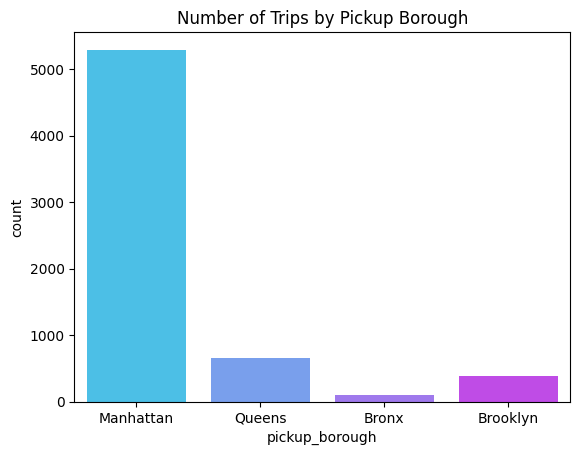

In [ ]:
sns.countplot(data=df, x='pickup_borough', palette='cool')
plt.title('Number of Trips by Pickup Borough')
plt.show()

In [ ]:
#Scatter plot [Distance vs Fare]

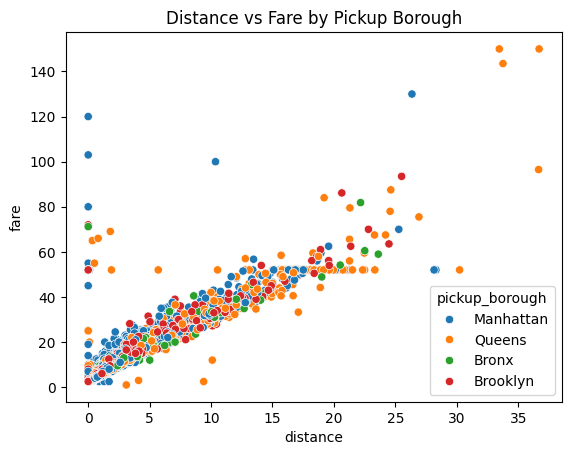

In [ ]:
sns.scatterplot(data=df, x='distance', y='fare', hue='pickup_borough')
plt.title('Distance vs Fare by Pickup Borough')
plt.show()


In [ ]:
#Heat map [Depend on correlation]

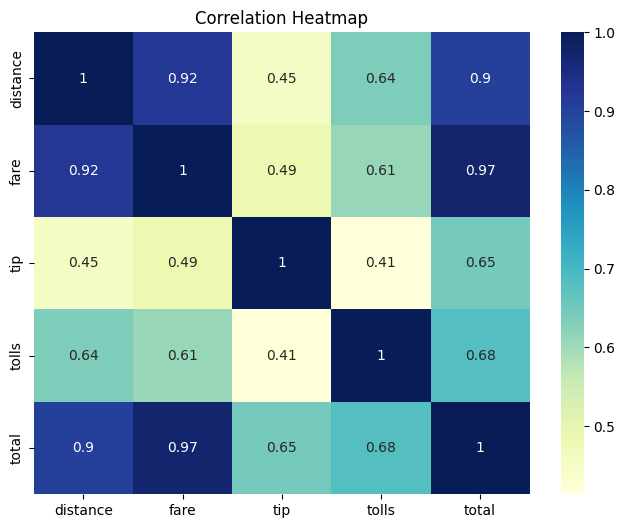

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['distance', 'fare', 'tip', 'tolls', 'total']].corr(), annot=True, cmap='YlGnBu')
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
#Pair plot [total fields]

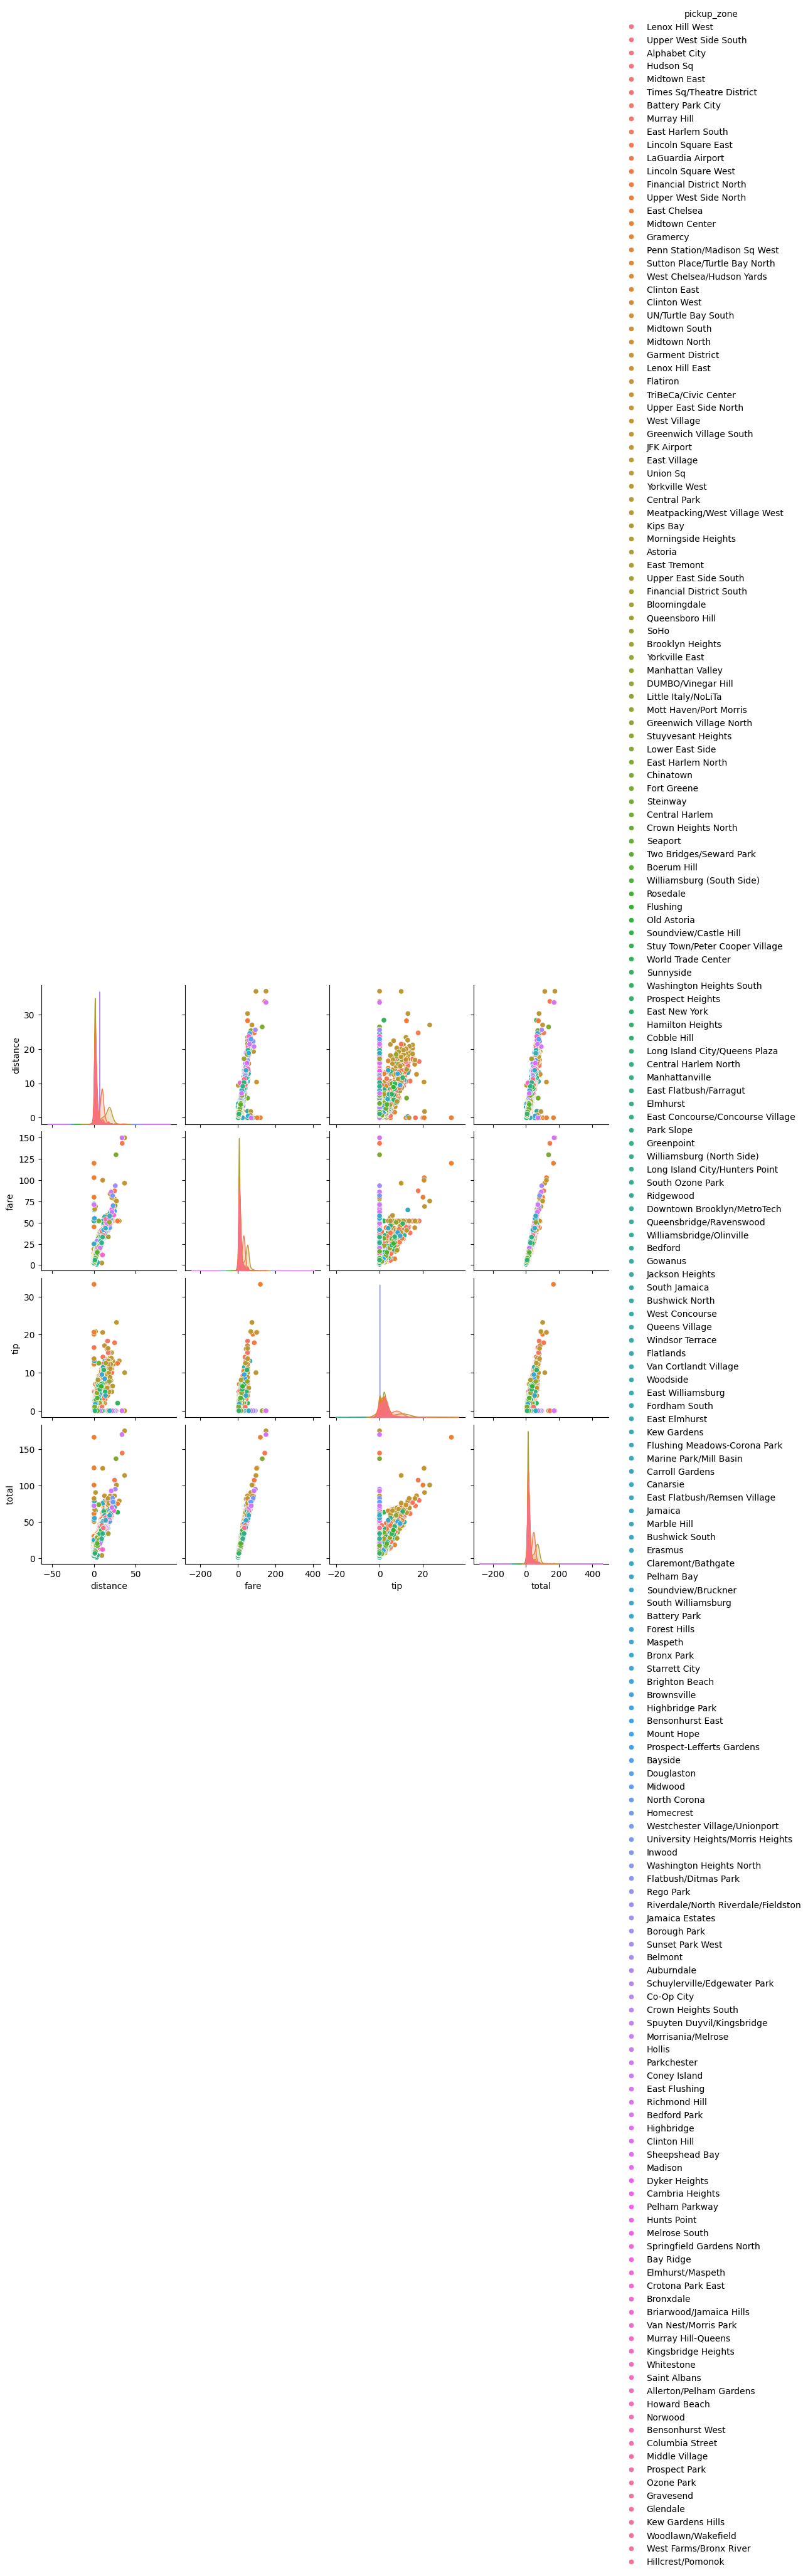

In [ ]:
sns.pairplot(df[['distance', 'fare', 'tip', 'total', 'pickup_zone']], hue='pickup_zone')
plt.show()


In [ ]:
#Violin Plot [Distrubition by payment]

/tmp/ipython-input-1631884834.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='payment', y='fare', palette='Set2')


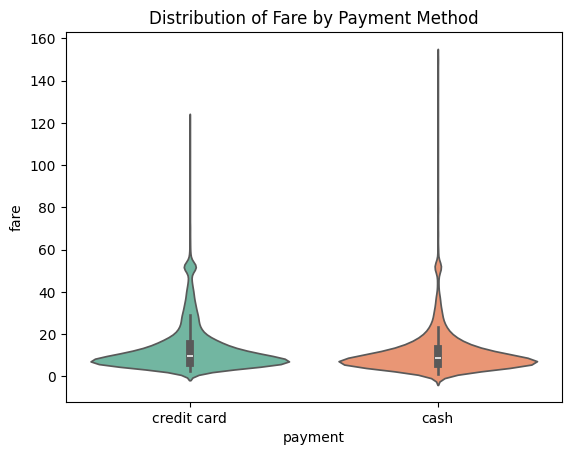

In [ ]:
sns.violinplot(data=df, x='payment', y='fare', palette='Set2')
plt.title('Distribution of Fare by Payment Method')
plt.show()
